In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

ss=StandardScaler()
df.loc[:,['Age','EstimatedSalary']]=ss.fit_transform(df.loc[:,['Age','EstimatedSalary']])

e:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(df.iloc[:,2:4],df.iloc[:,4],test_size=0.3,random_state = 0)
x_te

,Age,EstimatedSalary
132,-0.731153,0.506764
309,0.032952,-0.579736
341,-0.253587,0.154386
196,-0.731153,0.271845
246,-0.253587,-0.579736
60,-1.017692,-1.460681
155,-0.635640,-1.607506
261,-0.158074,2.180561
141,-1.877311,-0.051168
214,0.892570,-0.785290


In [5]:
from sklearn.svm import SVC
model=SVC(random_state=0,kernel='linear')
model.fit(x_tr,y_t

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
model.score(x_te,y_te)

0.8666666666666667

In [7]:
model.score(x_tr,y_tr)

0.8285714285714286

In [10]:
from sklearn.metrics import confusion_matrix
ypre=model.predict(x_te)
rs=confusion_matrix(y_te,ypre)
rs

array([[75,  4],
       [12, 29]], dtype=int64)

In [17]:
model.coef_

array([[1.66483541, 0.92830315]])

In [18]:
model.intercept_

array([-0.92039089])

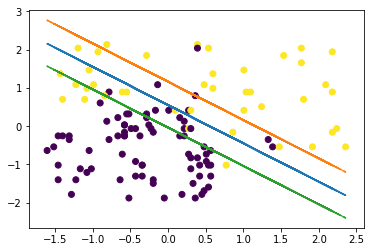

In [22]:
figure=plt.figure()
plt.plot(x_te['EstimatedSalary'],0.55-x_te['EstimatedSalary'])
plt.plot(x_te['EstimatedSalary'],1.16-x_te['EstimatedSalary'],'--')
plt.plot(x_te['EstimatedSalary'],-0.04-x_te['EstimatedSalary'],'--')
plt.scatter(x_te['EstimatedSalary'],x_te['Age'],c=y_te)